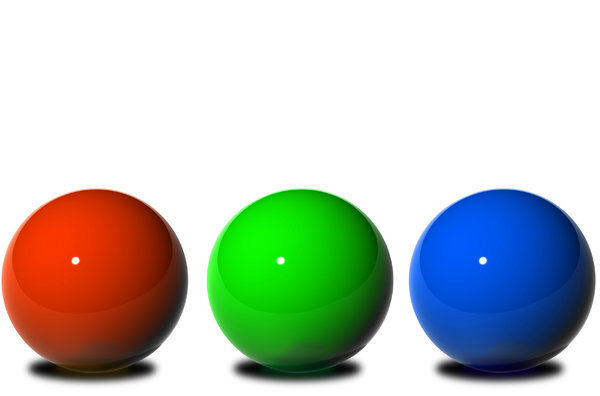

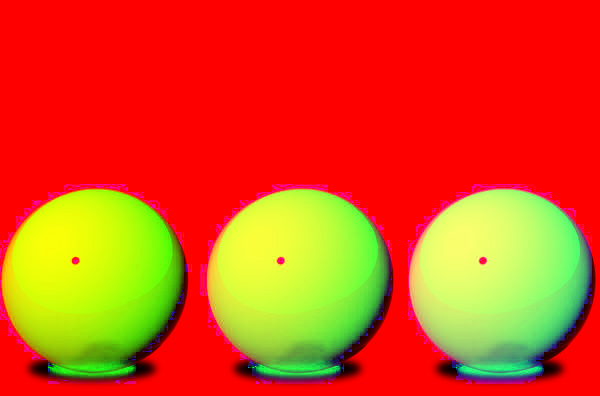

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/My Drive/sra_tasks_images/mask.jpg')
cv2_imshow(img)
img = np.array(img)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(img_hsv)

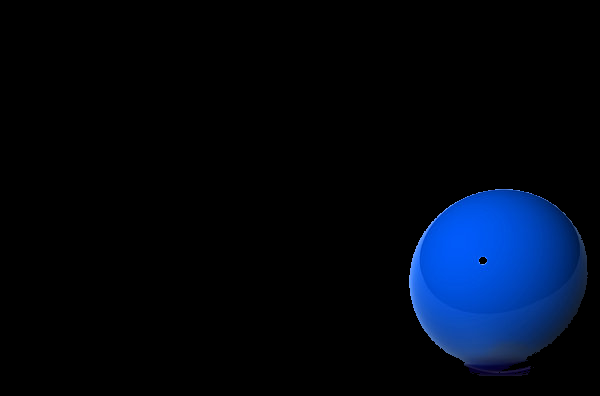

In [7]:
# lower mask (100-110)
lower_red = np.array([94,130,38])
upper_red = np.array([179,255,255])
mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

# upper mask (230-240)
lower_red = np.array([230,50,50])
upper_red = np.array([240,255,255])
mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

# join my masks
mask = mask0+mask1

output_img = img.copy()
output_img[np.where(mask==0)] = 0

output_hsv = img_hsv.copy()
output_hsv[np.where(mask==0)] = 0
cv2_imshow(output_img)


(396, 600, 3)
(396, 600, 3)


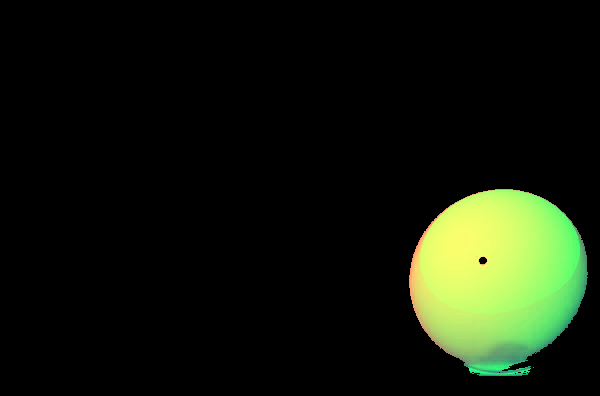

In [10]:
# lower mask (0-10)
lower_red = np.array([94,130,38])
upper_red = np.array([179,255,255])
mask01 = np.zeros([img.shape[0],img.shape[1],3], dtype='uint8')
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if(img_hsv[i,j,0] >= lower_red[0]) and (img_hsv[i,j,0] <= upper_red[0]) and \
    (img_hsv[i,j,1] >= lower_red[1]) and (img_hsv[i,j,2] >= lower_red[2]) \
      and (img_hsv[i,j,1] <= upper_red[1]) and (img_hsv[i,j,2] <= upper_red[2]):
      mask01[i,j] = [255]*3
    else:
      mask01[i,j] = [0]*3


# upper mask (170-180)
lower_red = np.array([230,50,50])
upper_red = np.array([240,255,255])
mask02 = np.zeros(img.shape, dtype='uint8')
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if(img_hsv[i,j,0] >= lower_red[0]) and (img_hsv[i,j,0] <= upper_red[0]) and \
    (img_hsv[i,j,1] >= lower_red[1]) and (img_hsv[i,j,2] >= lower_red[2]) \
      and (img_hsv[i,j,1] <= upper_red[1]) and (img_hsv[i,j,2] <= upper_red[2]):
      mask02[i,j] = [255]*3
    else:
      mask02[i,j] = [0]*3

# # join my masks
mask = mask01 + mask02

# set my output img to zero everywhere except my mask
output_img = img.copy()
# output_img[np.where(mask==0)] = 0
print(output_img.shape)
print(mask.shape)
# output_img = cv2.bitwise_and(output_img, output_img, mask=mask)
# cv2_imshow(output_img)

output_hsv = img_hsv.copy()
output_hsv[np.where(mask==0)] = 0
cv2_imshow(output_hsv)